In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/sleep-cycle-and-productivity/sleep_cycle_productivity.csv')

In [3]:
data.shape

(5000, 15)

In [4]:
data.head(5)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [5]:
data.isnull().sum()

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [6]:
data.dtypes

Date                              object
Person_ID                          int64
Age                                int64
Gender                            object
Sleep Start Time                 float64
Sleep End Time                   float64
Total Sleep Hours                float64
Sleep Quality                      int64
Exercise (mins/day)                int64
Caffeine Intake (mg)               int64
Screen Time Before Bed (mins)      int64
Work Hours (hrs/day)             float64
Productivity Score                 int64
Mood Score                         int64
Stress Level                       int64
dtype: object

<Axes: title={'center': 'Productivity Score'}, xlabel='Productivity Score'>

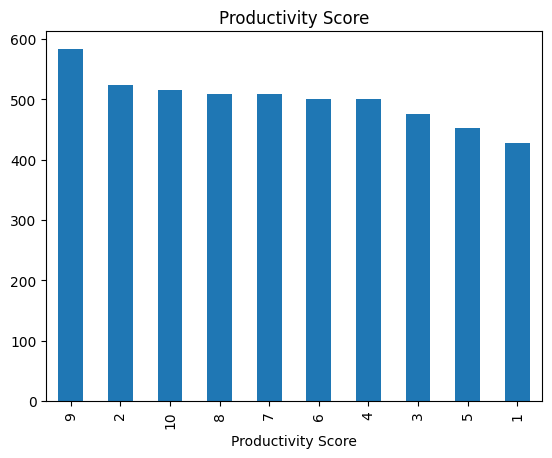

In [7]:
data['Productivity Score'].value_counts().plot(kind='bar', title='Productivity Score')

<Axes: title={'center': 'Mood Score'}, xlabel='Mood Score'>

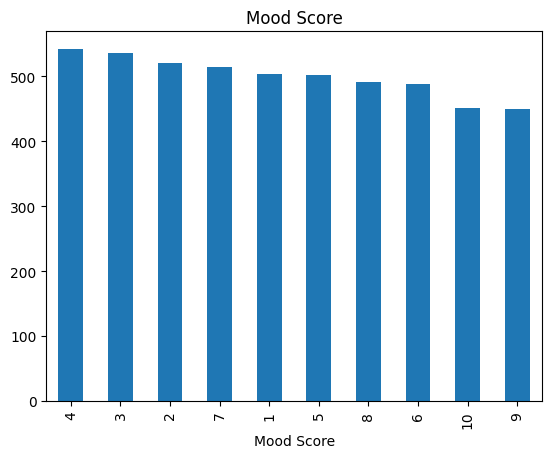

In [8]:
data['Mood Score'].value_counts().plot(kind='bar', title='Mood Score')

<Axes: >

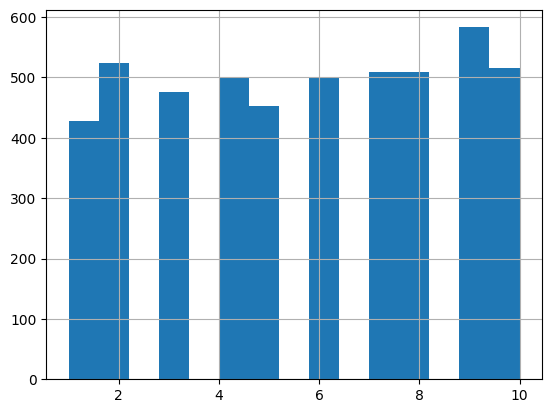

In [9]:
data['Productivity Score'].hist(bins=15)

In [10]:
numerical_columns = ['Age', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours', 
                     'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
                     'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score', 'Stress Level']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [12]:
X = data.drop('Productivity Score', axis=1)
y = data['Productivity Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)